# Conway's Game of Life
I had some trouble with making the animation work inside the notebook, if it does not work try installing:
- `pip install ipympl`
- `pip install nodejs-bin`

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
class GameOfLife :
    def __init__(self,n) :
        self.fTable = np.zeros((n,n),dtype=int)

    def Print(self) :
        print(self.fTable,"\n")

    def Initialize(self,listin) :
        NRow, NCol = zip(*listin)
        self.fTable[NRow,NCol] = 1 

    def Update(self) : 
        kernel = np.array([ #kernel to multiply to the whole table 
            [1,1,1],
            [1,0,1],
            [1,1,1]
        ])
        padded_Table = np.pad(self.fTable, pad_width=1, mode='constant', constant_values=0) #padded the starting state matrix
        sliding_windows = np.lib.stride_tricks.sliding_window_view(padded_Table, (3, 3)) #passes a sliding window of 3x3 matrix through the whole table 
        sums = (np.sum(sliding_windows*kernel,axis=(2,3))) #gives back a table containing the sums of kernel*window (basically tells how many points are adjacent to the given position)
        conditions = [
            (self.fTable == 1) & ((sums < 2) | (sums > 3)) ,
            (self.fTable == 1) & ((sums == 2) | (sums == 3) ) ,
            (self.fTable == 0) & (sums == 3) ,
            (self.fTable == 0) & (sums != 3)
        ]
        results = [0,1,1,0]

        self.fTable = np.select(conditions,results)

    def GetTable (self) :
        return self.fTable

    def EndlessMode(self,imgsize=(5,5),timeInterval = 200) : #old bugged version, but the bug consisted in never stopping -> use at your own risk!!!!! 
        
        fig, ax = plt.subplots(figsize=imgsize)
        cax = ax.imshow(self.GetTable(), cmap='Greys')
        
        def init() :
            cax.set_data(self.GetTable())
            return [cax]
        
        def update(frames):
            self.Update()
            cax.set_data(self.GetTable())
            return [cax]
              
        ani = FuncAnimation(fig, update, init_func=init, frames=50, interval=timeInterval, blit=True)
        plt.show()

        return ani
        

    def PlaySteps(self,NSteps,imgsize=(5,5),timeInterval = 500) : #plays the game and gives back the animation of the game
        
        fig, ax = plt.subplots(figsize=imgsize)
        cax = ax.imshow(self.GetTable(), cmap='Greys')
        
        def init() :
            cax.set_data(self.GetTable())
            return [cax]
        
        def update(frames):
            self.Update()
            cax.set_data(self.GetTable())
            if frames == NSteps - 1 : #necessary to avoid a weird behavior of FuncAnimation that does not stop after NSteps 
                plt.close(fig)
            #print(Tables[frames])
            return [cax]
              
        ani = FuncAnimation(fig, update, init_func=init, frames=NSteps, interval=timeInterval, blit=True)
        plt.show()

        return ani

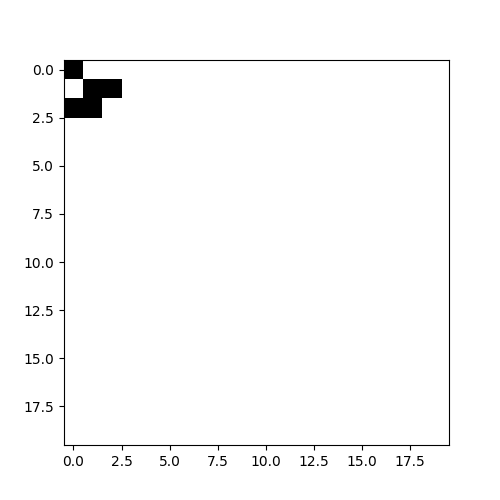

In [3]:
Game = GameOfLife(20) #you can customize the size of the NxN table 
Game.Initialize([(0,0),(2,0),(1,1),(1,2),(2,1)]) # the initializing array wants the positions of the alive points at the beginning
Game.PlaySteps(50,timeInterval=200)

## Game starting with 5000 completely random points, executes 100 steps

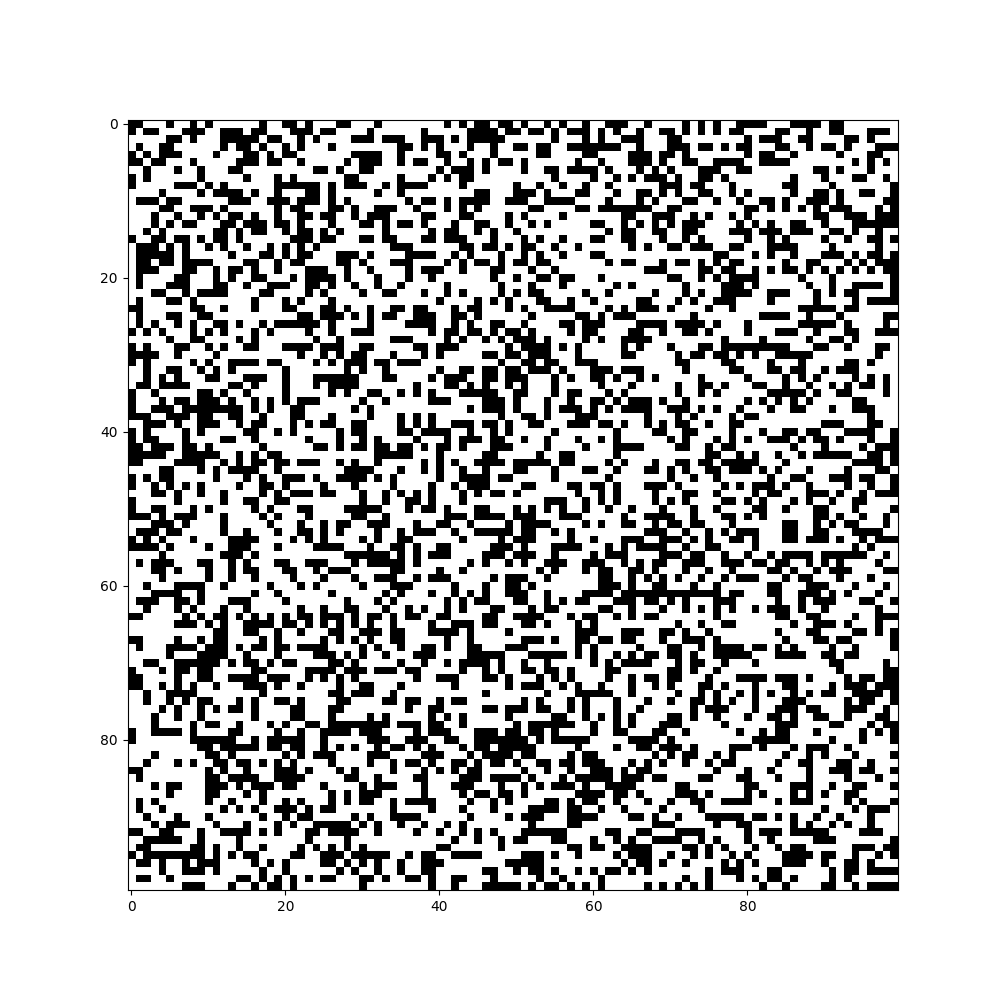

In [4]:
Game2 = GameOfLife(100) #you can customize the size of the NxN table 
rnd_points = np.random.randint(0,100,size=(5000,2))
Game2.Initialize(rnd_points) # the initializing array wants the positions of the alive points at the beginning
Game2.PlaySteps(100,(10,10),200)

## Endless mode
This simulation due to some weird behavior of the FuncAnimation function stops only by stopping the kernel (or you can restart it by launchin the cell again). I found it fun, so I kept it

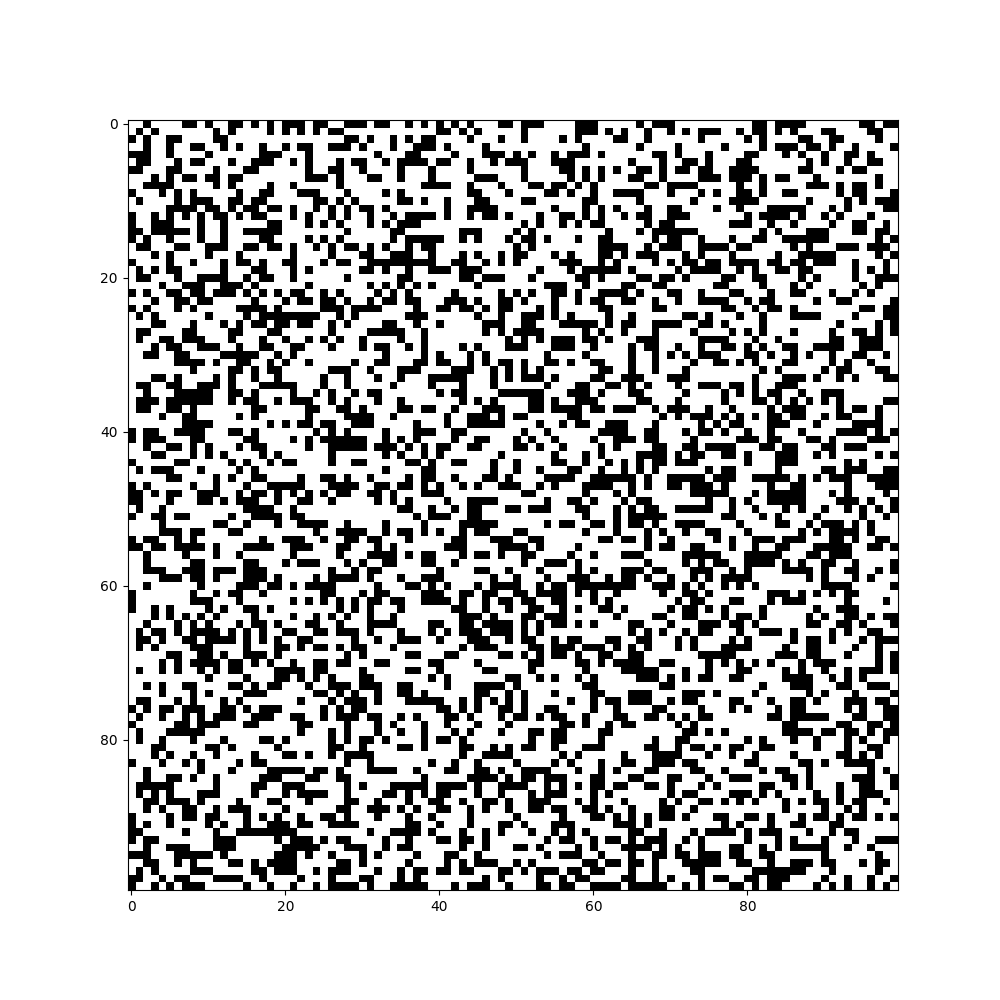

In [29]:
Game3 = GameOfLife(100) #you can customize the size of the NxN table 
rnd_points = np.random.randint(0,100,size=(5000,2))
Game3.Initialize(rnd_points) # the initializing array wants the positions of the alive points at the beginning
Game3.EndlessMode((10,10),200)